In [18]:
!pip install imblearn

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from gensim.models import Word2Vec
import numpy as np
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('/content/drive/MyDrive/reviews_with_sentiment.csv')

df.head()

top_id            date_modified  \
0  115447  2024-05-20 15:04:36.770   
1  115447  2024-05-20 15:04:36.770   
2  115447  2024-05-20 15:04:36.770   
3  115447  2024-05-20 15:04:36.770   
4  115447  2024-05-20 15:04:36.770   

                                                text  sentiment  
0  popped in here randomly on a sunday to get a b...          1  
1  everything wa delicious  even my husband  who ...          1  
2  the food is fresh  modern  and flavoursome  th...          1  
3  it ’ s a nice place to have a week end brunch ...          1  
4  nice scottish breakfast but service a little s...          1

In [21]:
# Randomly sample 100,000 rows
df1 = df.sample(n=10000, random_state=42)
df.head()

top_id            date_modified  \
0  115447  2024-05-20 15:04:36.770   
1  115447  2024-05-20 15:04:36.770   
2  115447  2024-05-20 15:04:36.770   
3  115447  2024-05-20 15:04:36.770   
4  115447  2024-05-20 15:04:36.770   

                                                text  sentiment  
0  popped in here randomly on a sunday to get a b...          1  
1  everything wa delicious  even my husband  who ...          1  
2  the food is fresh  modern  and flavoursome  th...          1  
3  it ’ s a nice place to have a week end brunch ...          1  
4  nice scottish breakfast but service a little s...          1

In [22]:

# Preprocess text data
def preprocess(text):
    # Tokenization, removing stop words, punctuation, etc.
    if isinstance(text, str):  # Check if text is a string
        tokens = text.lower().split()  # Basic tokenization
    else:
        tokens = []  # Handle non-string values (e.g., return an empty list)
    return tokens

df1['tokens'] = df1['text'].apply(preprocess)

# Train Word2Vec Model
sentences = df1['tokens'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=10)

#Feature Extraction (Create Sentence Vectors)
def get_sentence_vector(tokens, model):
    # Average word vectors to create sentence vector
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df1['sentence_vector'] = df1['tokens'].apply(lambda x: get_sentence_vector(x, word2vec_model))

# Train SVM Model
X = np.array(df1['sentence_vector'].tolist())
y = df1['sentiment'].values

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)



SVC(kernel='linear')

In [23]:
# Evaluate Model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.81      1.00      0.90      1629
           2       0.00      0.00      0.00       257

    accuracy                           0.81      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.66      0.81      0.73      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


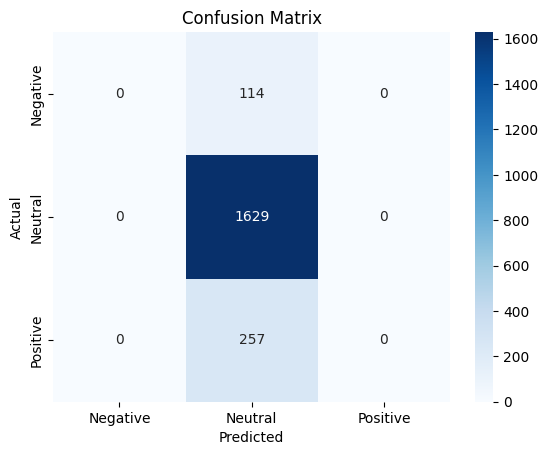

In [25]:
# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()